# **Lab 4 : EDA**

##### Name: Vivek Sapkal
##### Roll No.: B22AI066

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

### **Iris Dataset EDA**

Iris dataset preview:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 1200x1000 with 0 Axes>

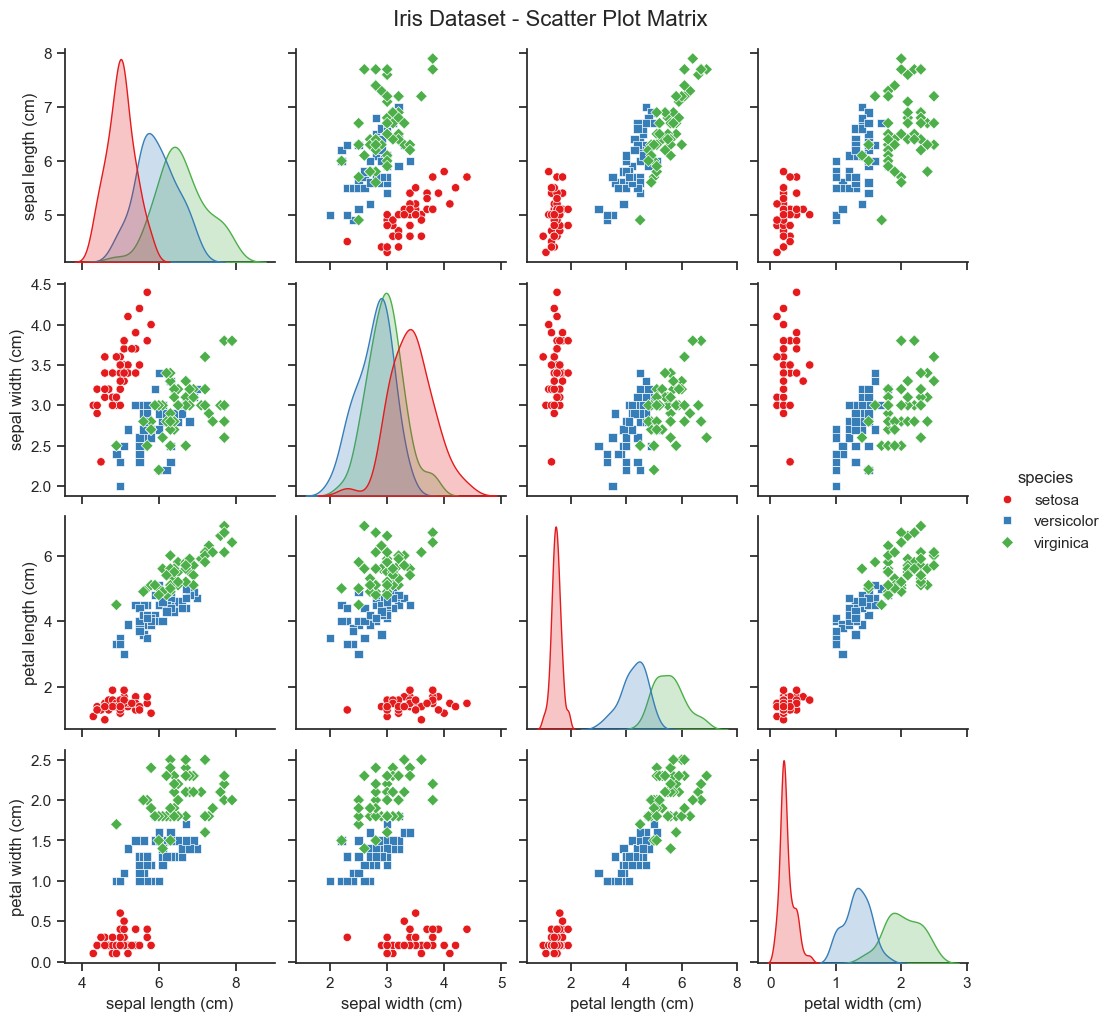

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("Iris dataset preview:")
display(df.head())

plt.figure(figsize=(12, 10))
sns.set_theme(style="ticks")

scatter_plot = sns.pairplot(df, hue='species', height=2.5, 
                           markers=['o', 's', 'D'], 
                           palette='Set1')
# plt.legend(title='Species', loc='upper right', labels=iris.target_names)

plt.suptitle('Iris Dataset - Scatter Plot Matrix', y=1.02, fontsize=16)
# plt.tight_layout()
plt.show()

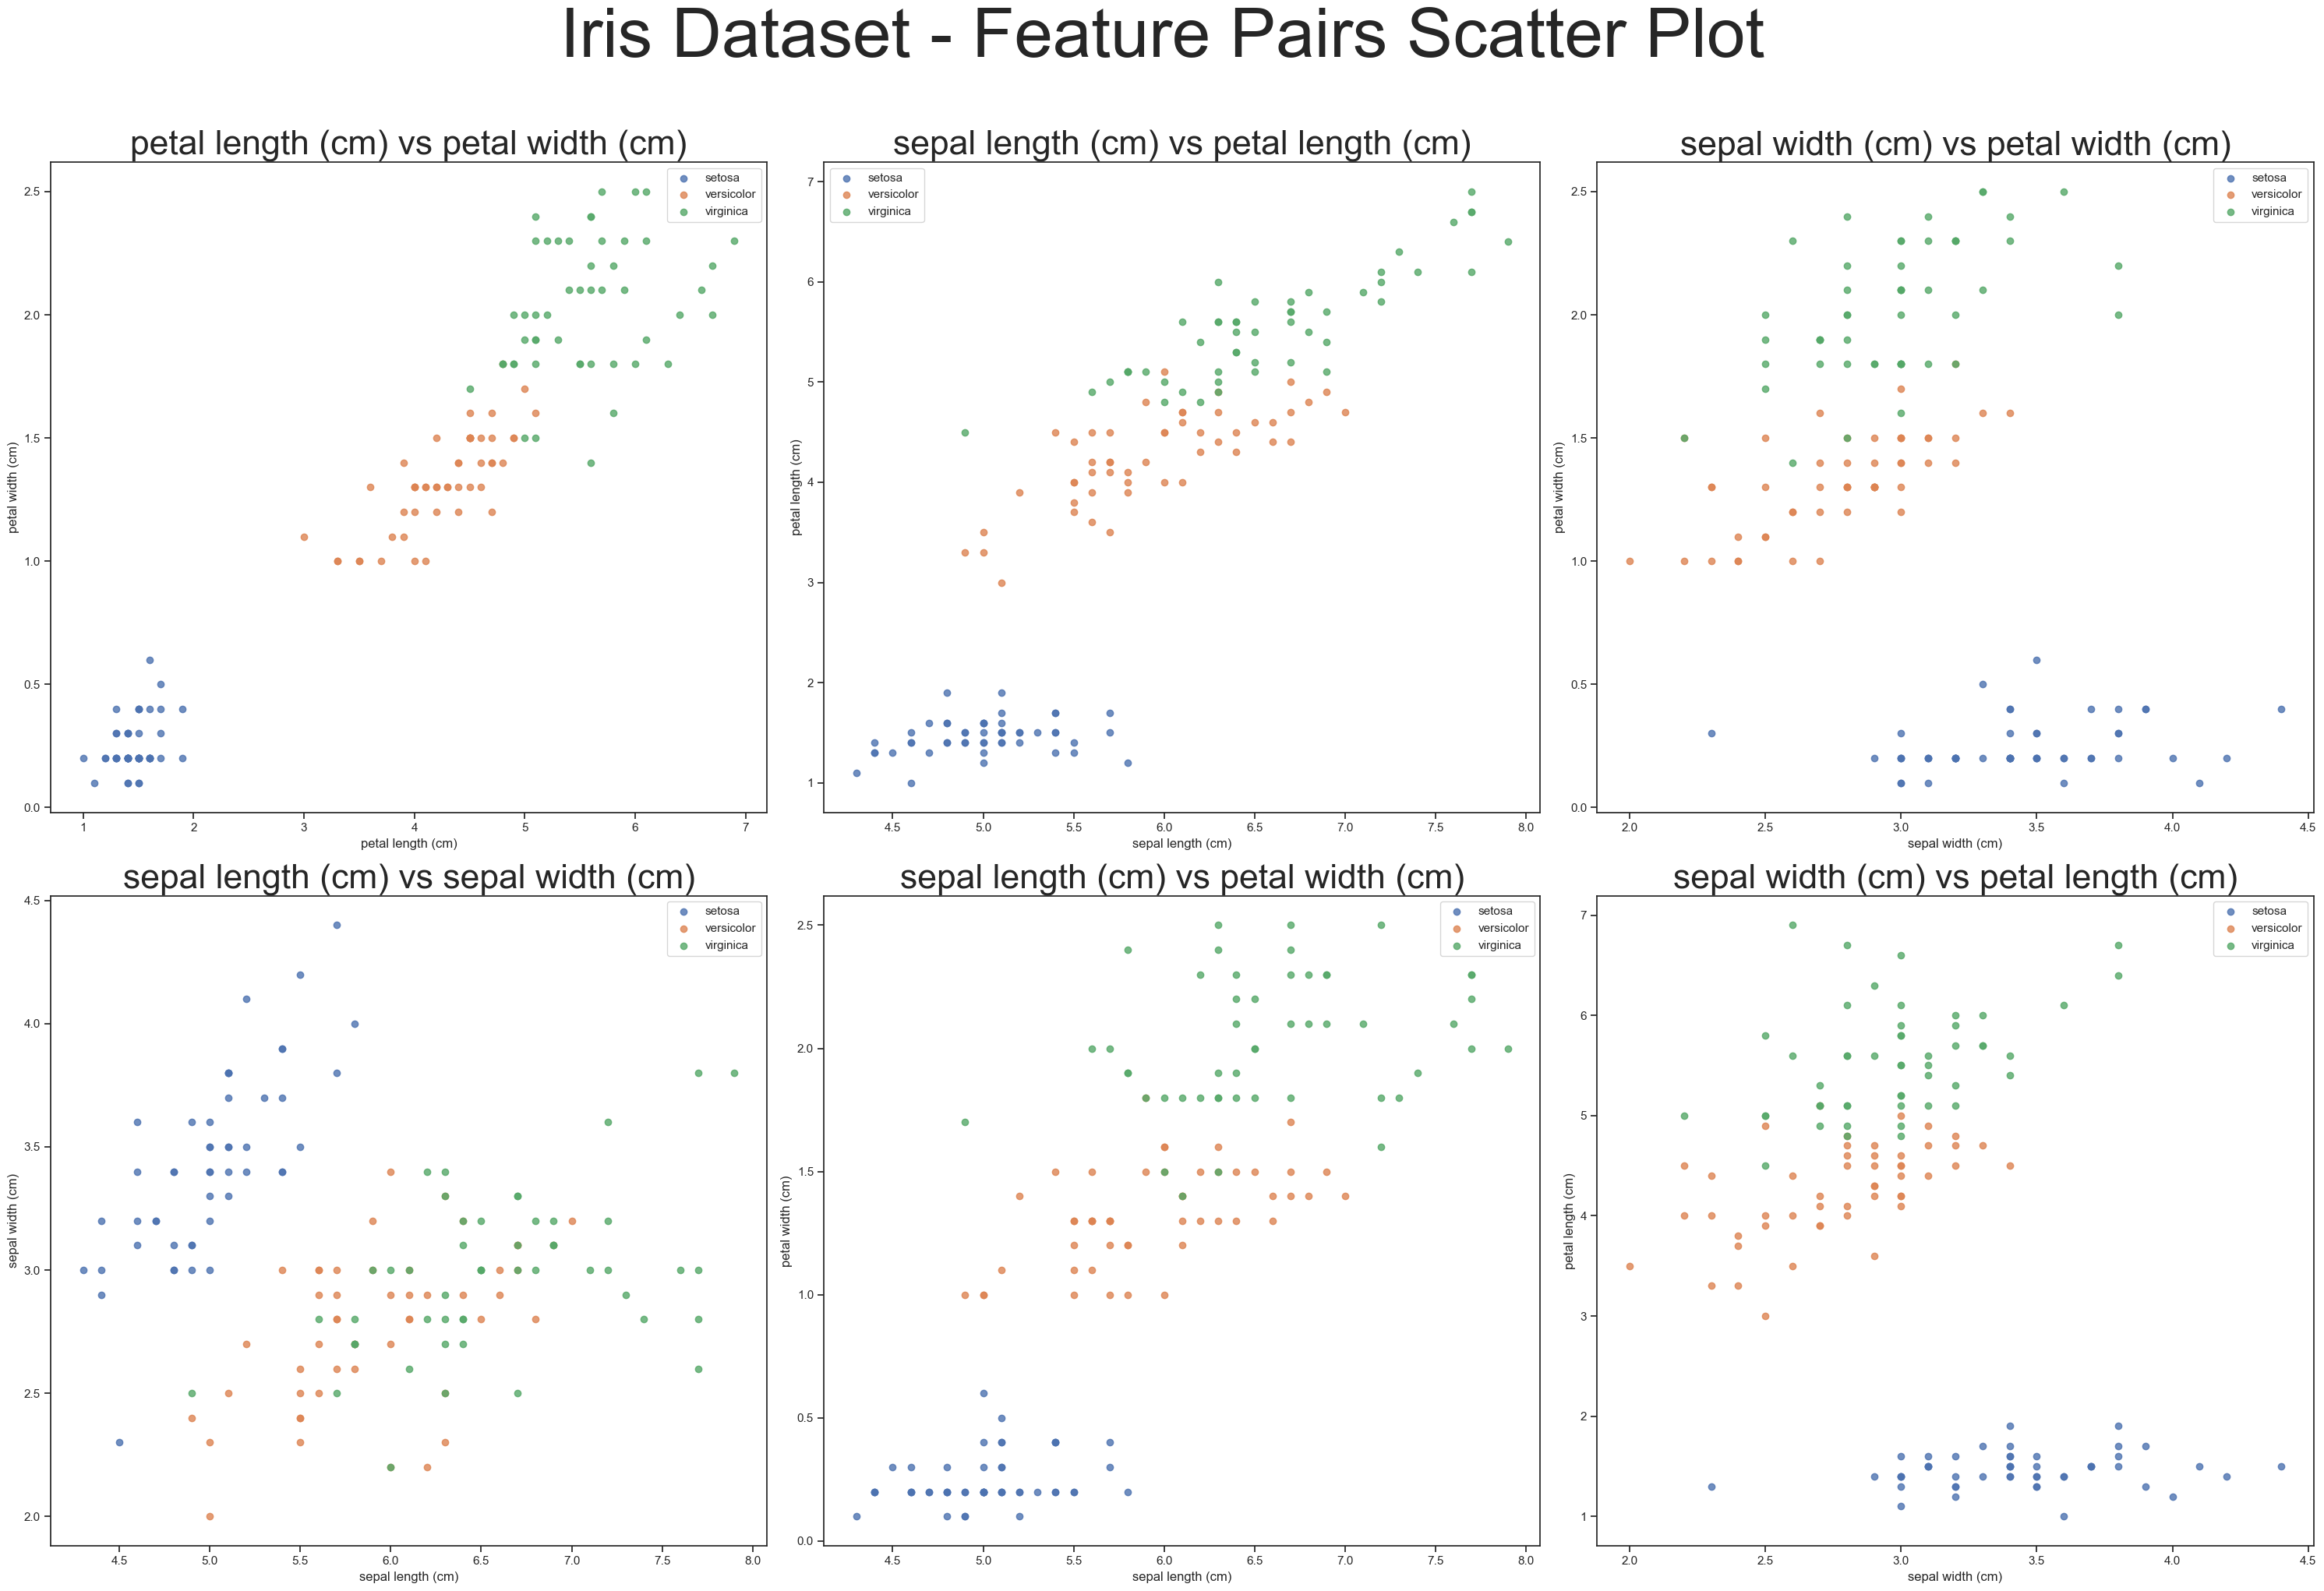

In [4]:
plt.figure(figsize=(30, 20))

feature_pairs = [
    ('petal length (cm)', 'petal width (cm)'),
    ('sepal length (cm)', 'petal length (cm)'),
    ('sepal width (cm)', 'petal width (cm)'),
    ('sepal length (cm)', 'sepal width (cm)'),
    ('sepal length (cm)', 'petal width (cm)'),
    ('sepal width (cm)', 'petal length (cm)'),
]

for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.subplot(2, 3, i)
    
    for species_name in iris.target_names:
        species_data = df[df['species'] == species_name]
        plt.scatter(species_data[x_feature], species_data[y_feature], 
                   label=species_name, alpha=0.8)
    
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend()
    plt.title(f'{x_feature} vs {y_feature}', fontsize=32)

plt.suptitle('Iris Dataset - Feature Pairs Scatter Plot', y=1.02, fontsize=64)
plt.tight_layout()
plt.show()

##### Linear Separability Analysis:
Based on the scatter plots, we can observe that:
- Setosa is clearly linearly separable from the other two species
- Versicolor and Virginica show some overlap and are not completely linearly separable from each other

### **EDA of Education Dataset**

In [5]:
df = pd.read_csv('education.csv')

# Display the first few rows of the dataset
print("Education dataset preview:")
display(df.head())

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

Education dataset preview:


,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


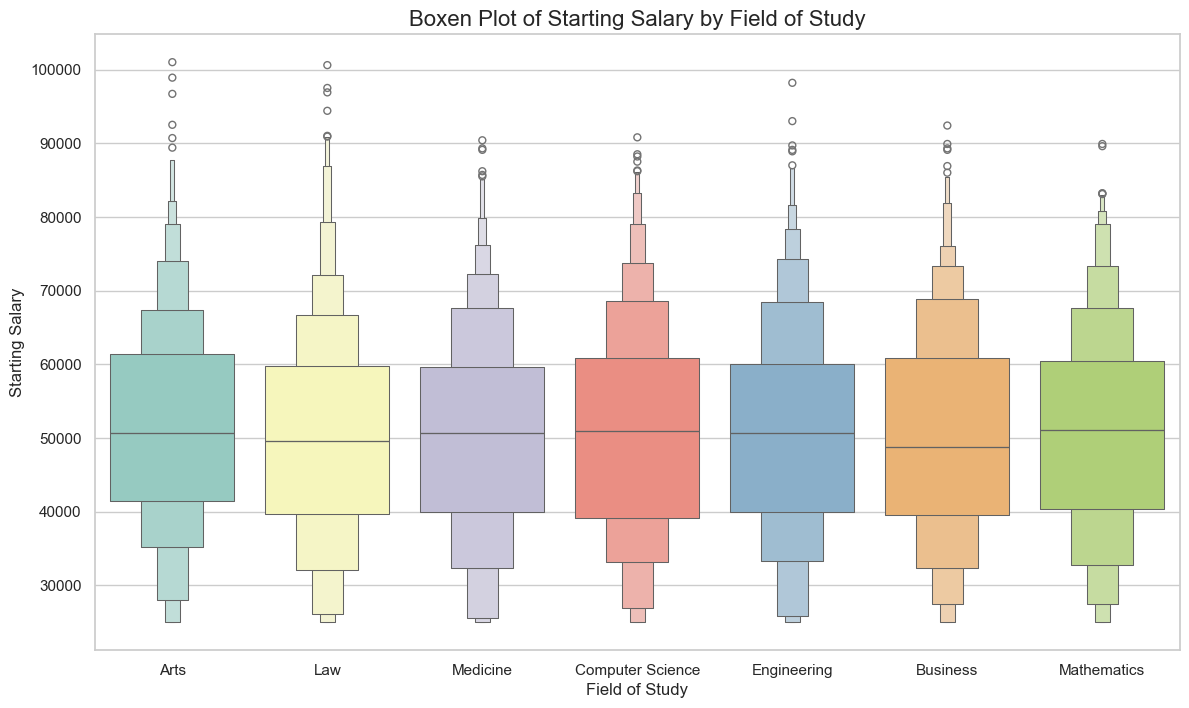

In [6]:
plt.figure(figsize=(14, 8))
sns.boxenplot(x='Field_of_Study', y='Starting_Salary', data=df, hue='Field_of_Study', palette='Set3')

plt.title('Boxen Plot of Starting Salary by Field of Study', fontsize=16)
plt.xlabel('Field of Study')
plt.ylabel('Starting Salary')
plt.xticks(rotation=0)
plt.show()

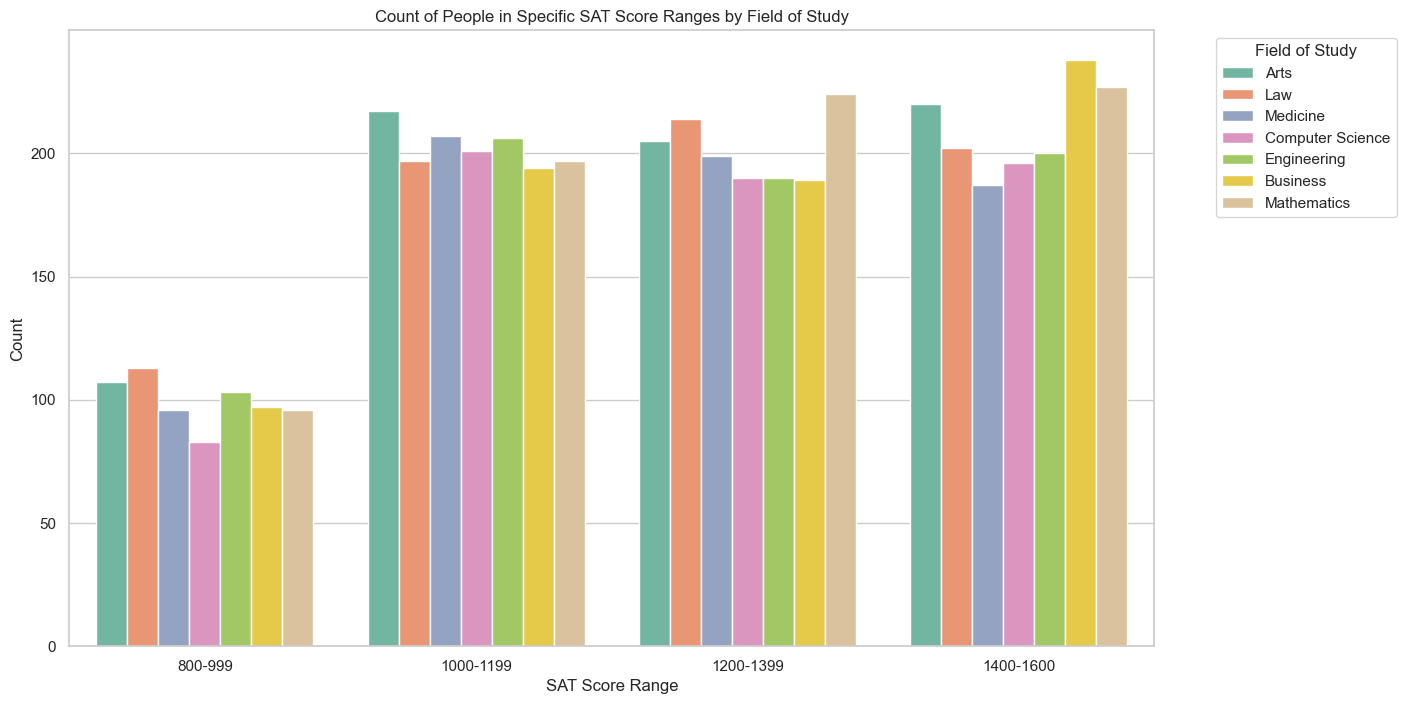

In [7]:
bins = [800, 1000, 1200, 1400, 1600]
labels = ['800-999', '1000-1199', '1200-1399', '1400-1600']
df['SAT_Score_Range'] = pd.cut(df['SAT_Score'], bins=bins, labels=labels, right=False)

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Create a count plot for SAT Score Ranges by Field of Study
plt.figure(figsize=(14, 8))
sns.countplot(x='SAT_Score_Range', hue='Field_of_Study', data=df, palette='Set2')

plt.title('Count of People in Specific SAT Score Ranges by Field of Study')
plt.xlabel('SAT Score Range')
plt.ylabel('Count')
plt.legend(title='Field of Study', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

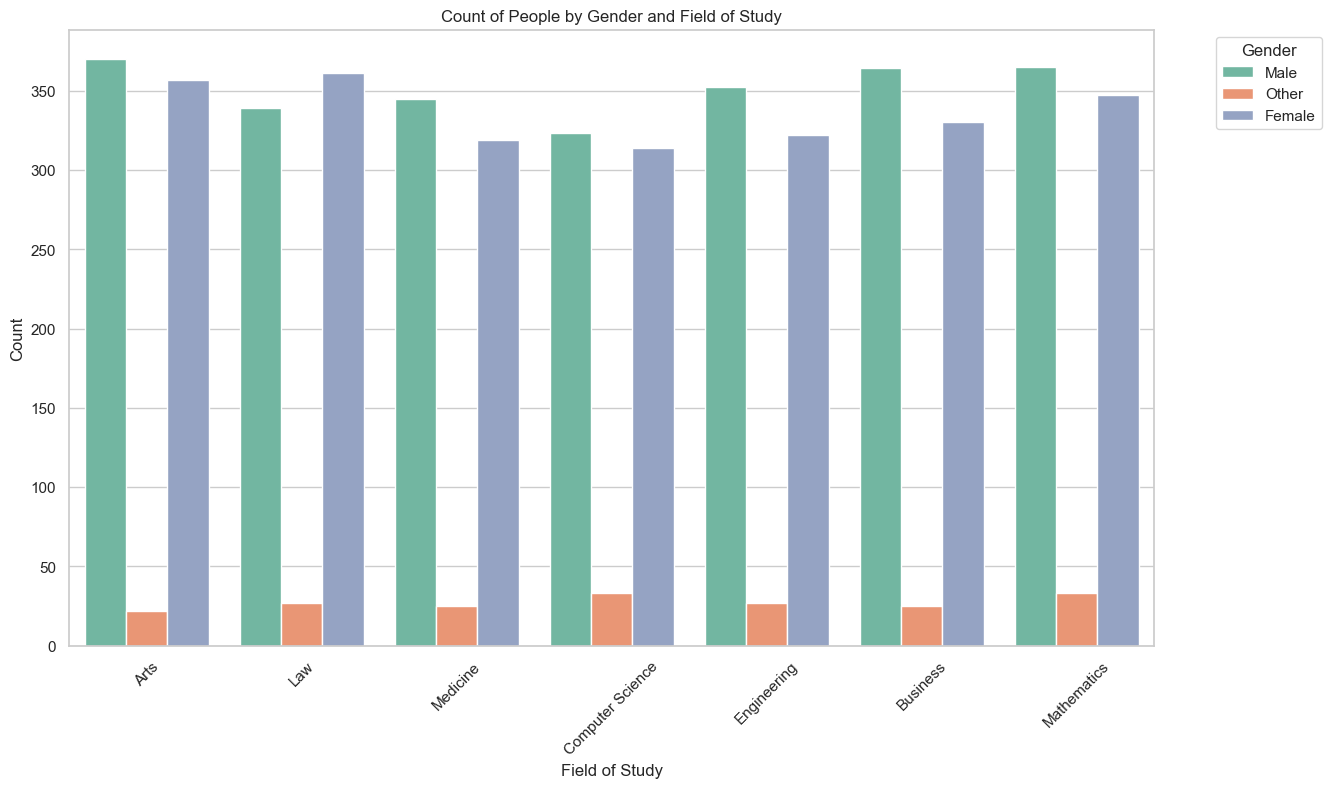

In [8]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Field_of_Study', hue='Gender', data=df, palette='Set2')

plt.title('Count of People by Gender and Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

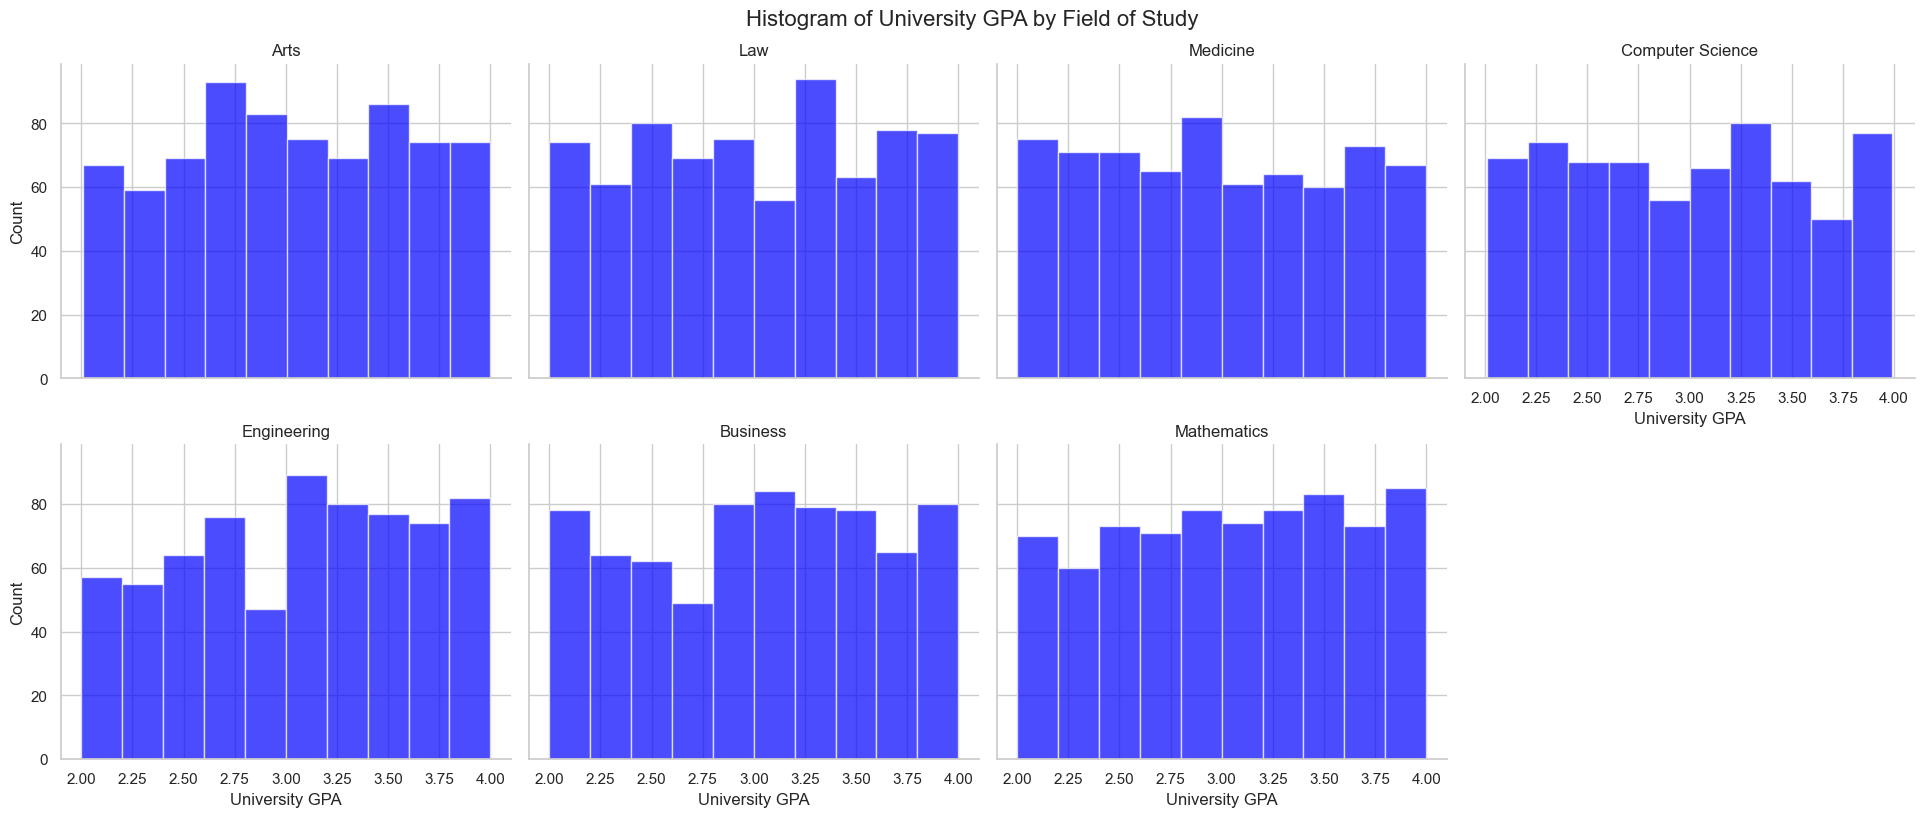

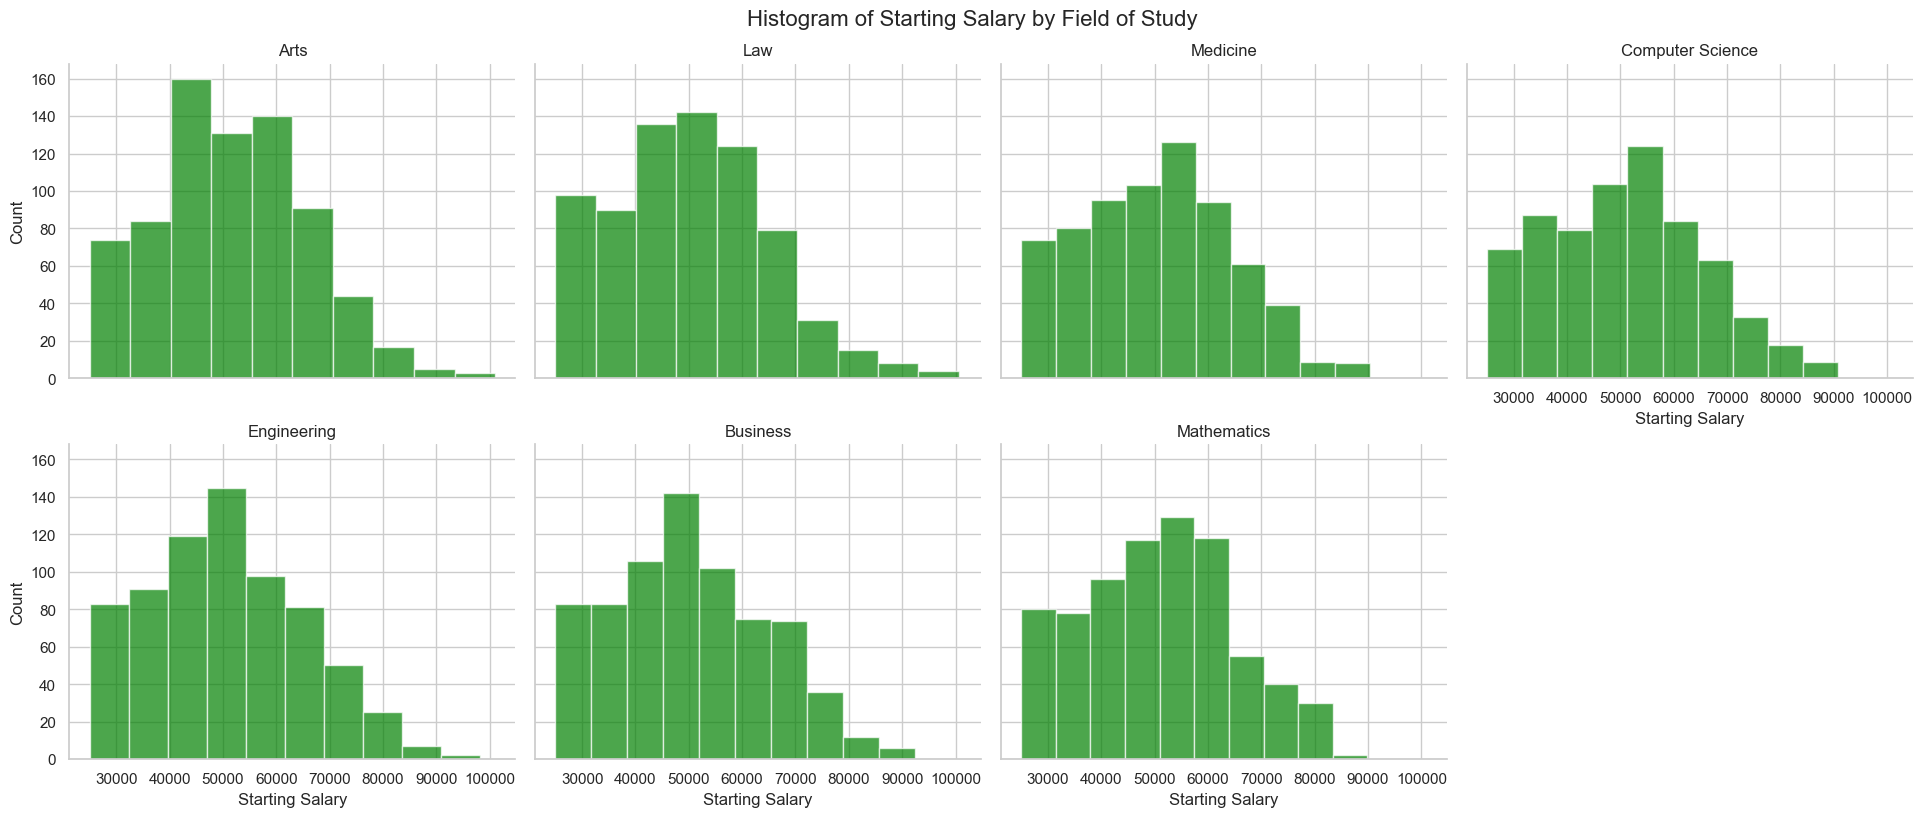

In [9]:
g = sns.FacetGrid(df, col="Field_of_Study", col_wrap=4, height=4, aspect=1.2)
g.map(plt.hist, "University_GPA", bins=10, alpha=0.7, color='blue')

g.set_axis_labels("University GPA", "Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Histogram of University GPA by Field of Study', y=1.02, fontsize=16)
plt.show()

g = sns.FacetGrid(df, col="Field_of_Study", col_wrap=4, height=4, aspect=1.2)
g.map(plt.hist, "Starting_Salary", bins=10, alpha=0.7, color='green')

g.set_axis_labels("Starting Salary", "Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Histogram of Starting Salary by Field of Study', y=1.02, fontsize=16)
plt.show()

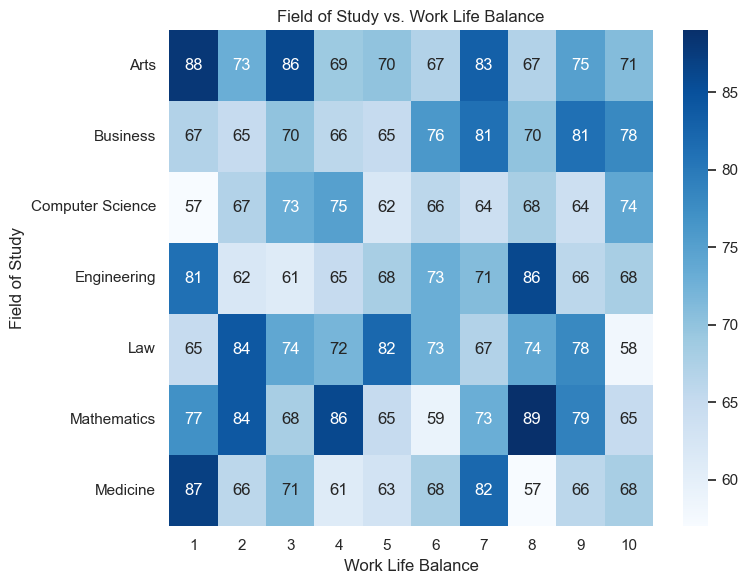

In [ ]:
data_pivot = pd.crosstab(df["Field_of_Study"], df["Work_Life_Balance"])

plt.figure(figsize=(8, 6))
sns.heatmap(data_pivot, annot=True, fmt="d", cmap="Blues")
plt.title("Field of Study vs. Work Life Balance")
plt.xlabel("Work Life Balance")
plt.ylabel("Field of Study")
plt.tight_layout()
plt.show()

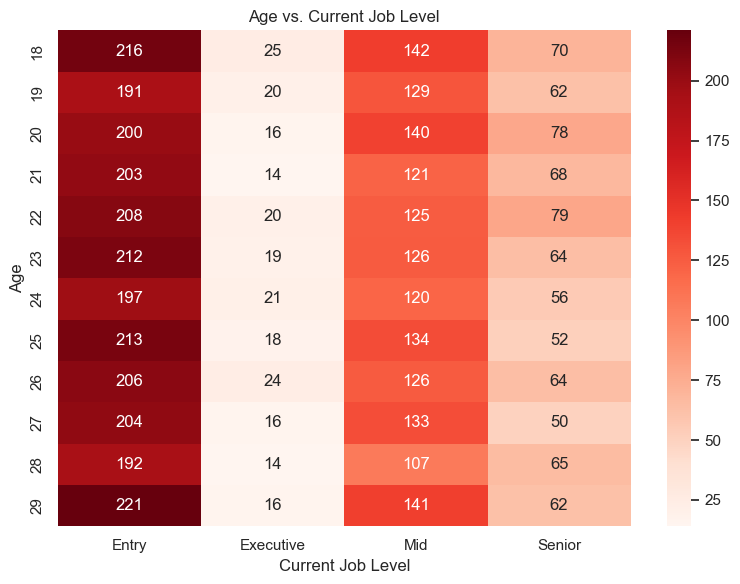

In [ ]:
data_pivot = pd.crosstab(df["Age"], df["Current_Job_Level"])

plt.figure(figsize=(8, 6))
sns.heatmap(data_pivot, annot=True, fmt="d", cmap="Reds")
plt.title("Age vs. Current Job Level")
plt.xlabel("Current Job Level")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

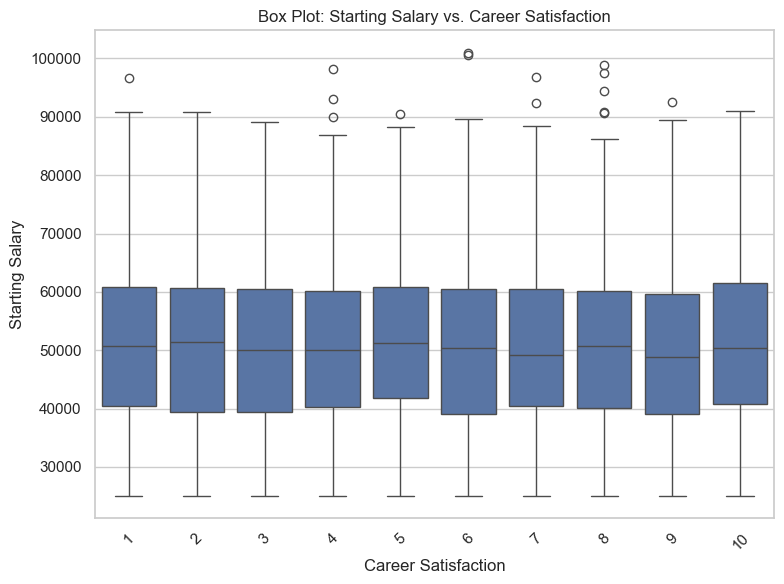

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Career_Satisfaction", y="Starting_Salary", data=df)
plt.title("Box Plot: Starting Salary vs. Career Satisfaction")
plt.xlabel("Career Satisfaction")
plt.ylabel("Starting Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

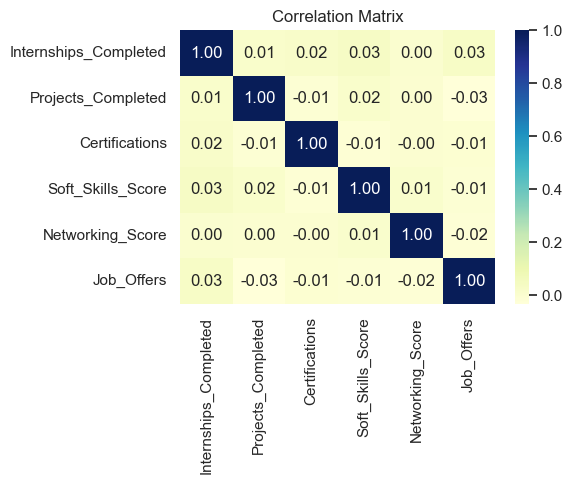

In [14]:
cols = [
    "Internships_Completed",
    "Projects_Completed",
    "Certifications",
    "Soft_Skills_Score",
    "Networking_Score",
    "Job_Offers"
]

corr_matrix = df[cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

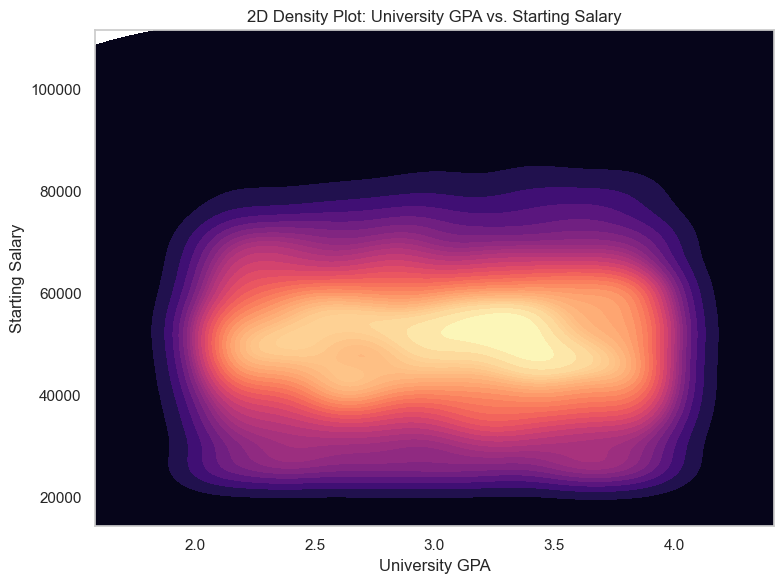

In [15]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df,
    x="University_GPA",
    y="Starting_Salary",
    cmap="magma",
    fill=True,
    thresh=0,
    levels=30
)
plt.title("2D Density Plot: University GPA vs. Starting Salary")
plt.xlabel("University GPA")
plt.ylabel("Starting Salary")
plt.tight_layout()
plt.show()